In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("income.csv")
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


## Data Preprocessing

In [6]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [9]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
data['occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', ' ?', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

Now we have to convert ? to nan values so reload the dataset with na_values parameter

In [11]:
data= pd.read_csv("income.csv",na_values = [' ?'])
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [54]:
df = data.copy()

In [55]:
df.shape

(31978, 13)

In [56]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [57]:
df = df.dropna(axis = 0)

In [58]:
df.shape

(30162, 13)

## Data Visualization

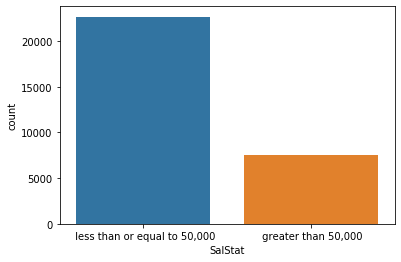

In [59]:
sns.countplot('SalStat',data = df)

Males have higher chances to earn more than 50000

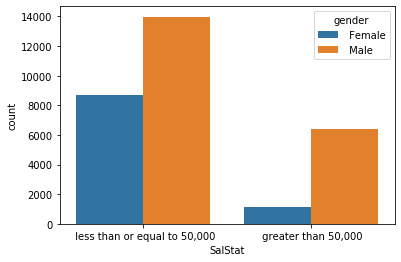

In [60]:
sns.countplot('SalStat',hue = 'gender',data = df)

Self Employed people earn more than 50000 in most of the cases

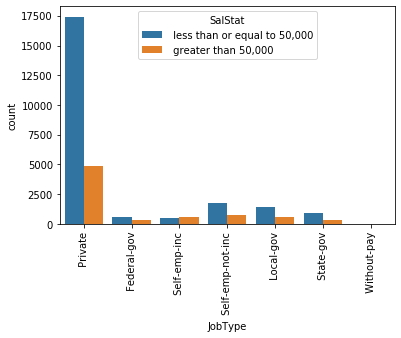

In [61]:
sns.countplot('JobType',hue = 'SalStat',data = df)
plt.xticks(rotation=90)
plt.show()

manager and prof-speciality are more likely to earn more than 50000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

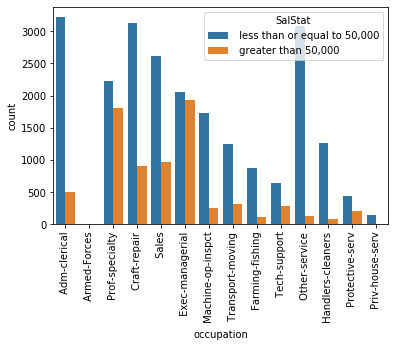

In [62]:
sns.countplot('occupation',hue = 'SalStat',data = df)
plt.xticks(rotation = 90)

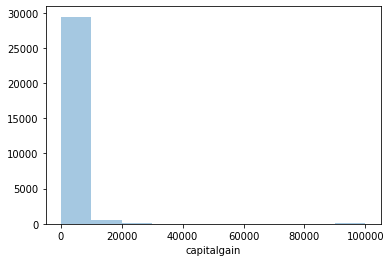

In [63]:
sns.distplot(df['capitalgain'],kde = False,bins = 10)

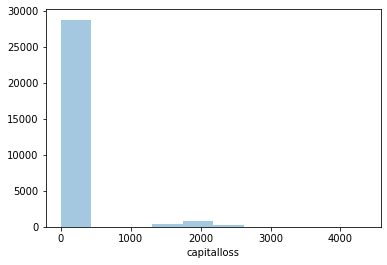

In [64]:
sns.distplot(df['capitalloss'],kde = False,bins = 10)

People who work 40-50 hours are likely to earn more than 50000

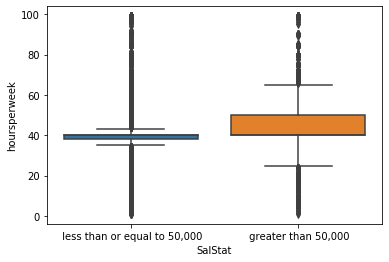

In [65]:
sns.boxplot(x = df['SalStat'],y = df['hoursperweek'])

In [66]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [67]:
#JobType_dummy= pd.get_dummies(df['JobType'],drop_first = True)
EdType_dummy = pd.get_dummies(df['EdType'],drop_first = True)
maritalstatus_dummy = pd.get_dummies(df['maritalstatus'],drop_first = True)
occupation_dummy = pd.get_dummies(df['occupation'],drop_first = True)
relationship_dummy = pd.get_dummies(df['relationship'],drop_first = True)
#race_dummy = pd.get_dummies(df['race'],drop_first = True)
#gender_dummy = pd.get_dummies(df['gender'],drop_first = True)
#nativecountry_dummy = pd.get_dummies(df['nativecountry'],drop_first = True)


In [68]:
df['SalStat'].value_counts()

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

In [69]:
df['SalStat'] = df['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})

In [70]:
df = pd.concat([df,JobType_dummy,EdType_dummy,maritalstatus_dummy,occupation_dummy,relationship_dummy],axis = 1)

In [71]:
df = df.drop(['JobType','EdType','maritalstatus','occupation','relationship','race','gender','nativecountry'],axis = 1)


In [72]:
df.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Model Building

In [73]:
inputs = df.drop(['SalStat'],axis = 1)
target = df['SalStat']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.30, random_state=7)

In [94]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 470)
lr_model.fit(x_train,y_train)

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=470, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
pred = lr_model.predict(x_test)

In [96]:
lr_model.score(x_test,y_test)

0.8529119239694994

## Hyperparameter Tunning

In [92]:

#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params = {'C':range(1,500)
         }
rand_search = RandomizedSearchCV(lr_model, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8426088192109127

In [93]:
rand_search.best_params_

{'C': 470}

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[6370,  462],
       [ 863, 1354]], dtype=int64)

## Random Forest


In [98]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators= 1150, min_samples_split= 400, max_depth= 27)
rf_class.fit(x_train,y_train)
pred = rf_class.predict(x_test)

In [99]:
rf_class.score(x_test,y_test)

0.8627472648911482

In [82]:

#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':range(20,2001,10),
         'max_depth':range(5,61,2),
         'min_samples_split':range(200,1201,200)
         }
rand_search = RandomizedSearchCV(rf_class, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

0.851371193103775

In [88]:
rand_search.best_params_
 

{'n_estimators': 1150, 'min_samples_split': 400, 'max_depth': 27}

In [100]:
confusion_matrix(y_test,pred)

array([[6438,  394],
       [ 848, 1369]], dtype=int64)